In [5]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as ncdf
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable


nc_file = '/lustre/eaglefs/scratch/lmartine/amrwind_wenoz/post_processing/sampling30000.nc'
#nc_file = '/projects/hfm/tony/IEATask29_precursor_for_ganesh/post_processing/sampling30000.nc'

data = ncdf.Dataset(nc_file, 'r')['p_hub']

x = data['coordinates'][:,0]
y = data['coordinates'][:,1]
z = data['coordinates'][:,2]

xu = np.unique(x)
yu = np.unique(y)
zu = np.unique(z)

# The plane height to sample
zi = 57

# List from Lawrence
'''
     T1      T2   I   J   K      X      Y      Z       UX  STD_U/U    ALPHA
17880.0 18120.0 180  56   3 4336.9 1349.3   57.0 6.128006 0.066158 0.025166
19560.0 19800.0  72  84   3 1734.8 2023.9   57.0 6.134673 0.069249 0.025592
15000.0 15240.0  72  96   3 1734.8 2313.0   57.0 6.123323 0.068878 0.026254
16680.0 16920.0 136  96   3 3276.8 2313.0   57.0 6.145181 0.066684 0.025684
18120.0 18360.0  88  96   3 2120.3 2313.0   57.0 6.105696 0.068701 0.027014
15240.0 15480.0 140 108   3 3373.2 2602.2   57.0 6.107237 0.068151 0.025599
16440.0 16680.0  84 116   3 2023.9 2794.9   57.0 6.101912 0.066181 0.027327
18360.0 18600.0 140 120   3 3373.2 2891.3   57.0 6.114893 0.068995 0.024621
18360.0 18600.0 164 148   3 3951.4 3565.9   57.0 6.101714 0.066419 0.027295
18600.0 18840.0 188 156   3 4529.7 3758.7   57.0 6.112753 0.067700 0.025707
15960.0 16200.0 184 188   3 4433.3 4529.7   57.0 6.116136 0.067661 0.024066
16920.0 17160.0 192 180   3 4626.1 4336.9   57.0 6.116706 0.066550 0.024478
17160.0 17400.0 148 180   3 3565.9 4336.9   57.0 6.120597 0.068142 0.027423
16680.0 16920.0  60 188   3 1445.6 4529.7   57.0 6.133780 0.068377 0.026110
'''

# The list of points to sample time histories
xyz_ls = [
    [xu[180], yu[56], zi, 17880.0], 
    [xu[72], yu[84], zi, 19560.0],
    [xu[72], yu[96], zi, 15000.0],
    [xu[136], yu[96], zi, 16680.0], 
    [xu[88], yu[96], zi, 18120.0],
    [xu[140], yu[108], zi, 15240.0],    
    [xu[84], yu[116], zi, 16440.0], 
    [xu[140], yu[120], zi, 18360.0],
    [xu[164], yu[148], zi, 18360.0],    
    [xu[188], yu[156], zi, 18600.0], 
    [xu[184], yu[188], zi, 15960.0],
    [xu[192], yu[180], zi, 16920.0],
    [xu[148], yu[180], zi, 17160.0],
    [xu[60], yu[188], zi, 16680.0],
]



4336.941176470588 1349.270588235294 57


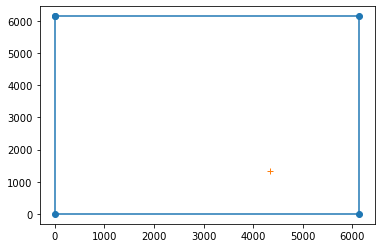

<Figure size 432x288 with 0 Axes>

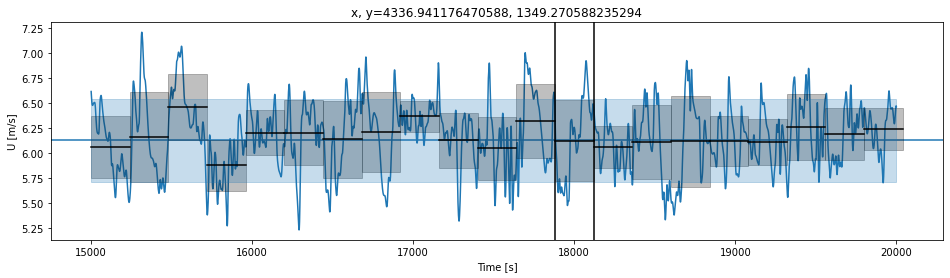

1734.7764705882353 2023.9058823529413 57


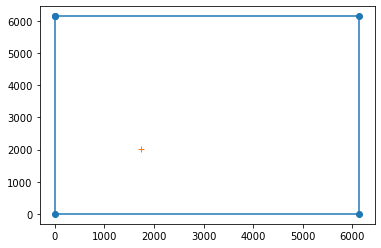

<Figure size 432x288 with 0 Axes>

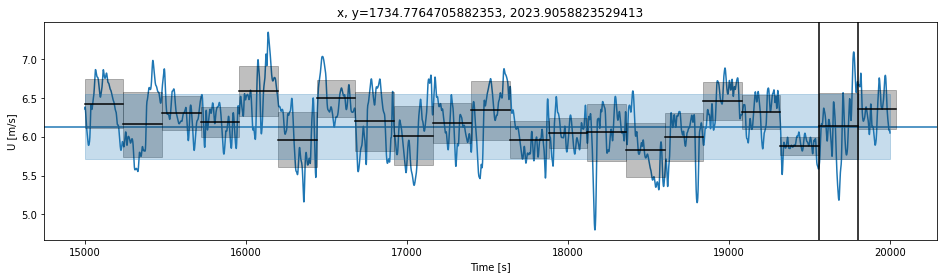

1734.7764705882353 2313.035294117647 57


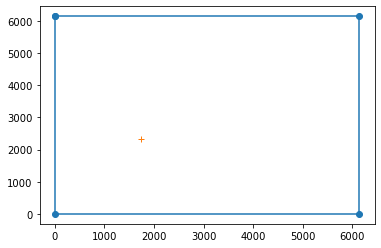

<Figure size 432x288 with 0 Axes>

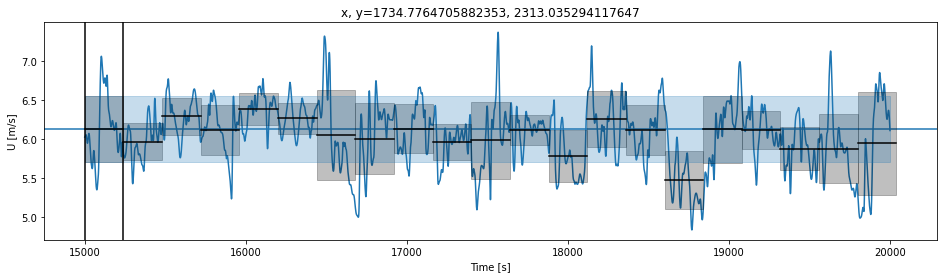

3276.8 2313.035294117647 57


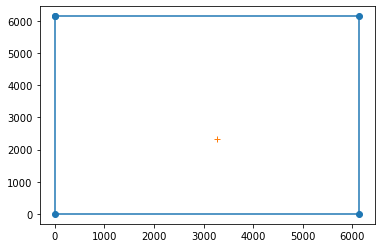

<Figure size 432x288 with 0 Axes>

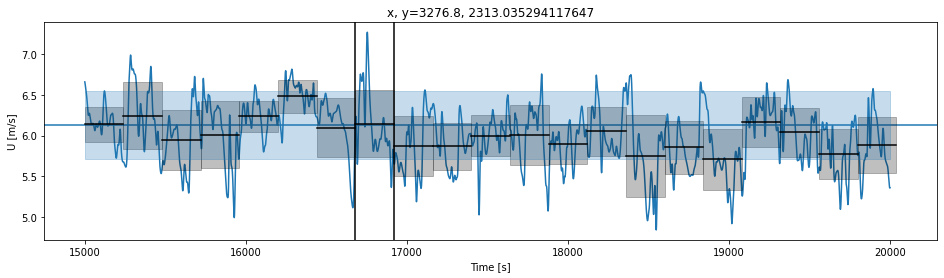

2120.282352941176 2313.035294117647 57


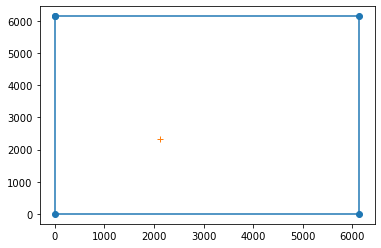

<Figure size 432x288 with 0 Axes>

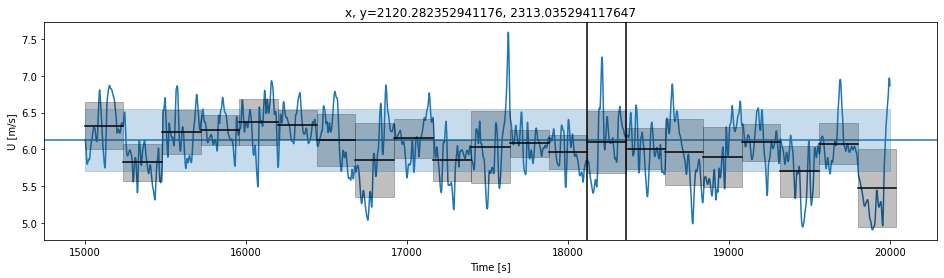

3373.176470588235 2602.164705882353 57


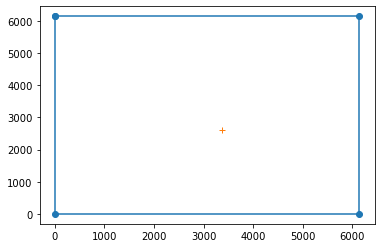

<Figure size 432x288 with 0 Axes>

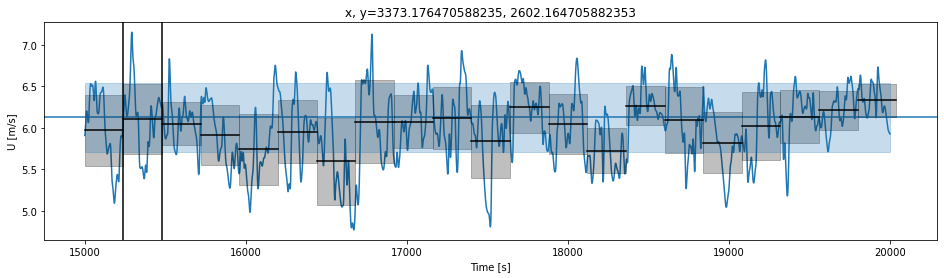

2023.9058823529413 2794.9176470588236 57


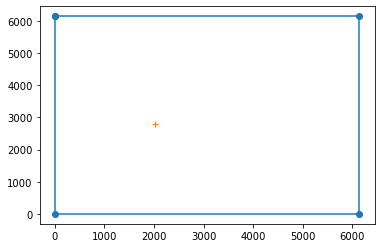

<Figure size 432x288 with 0 Axes>

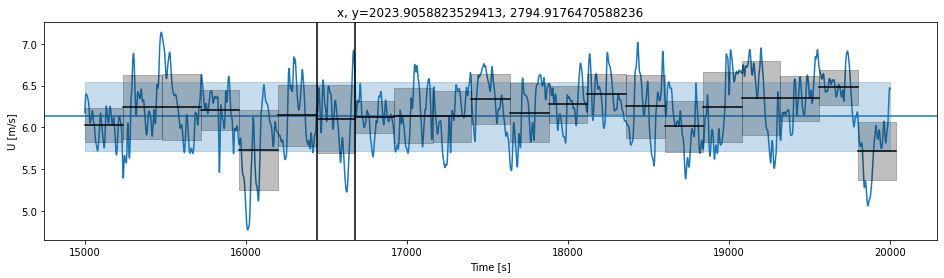

3373.176470588235 2891.2941176470586 57


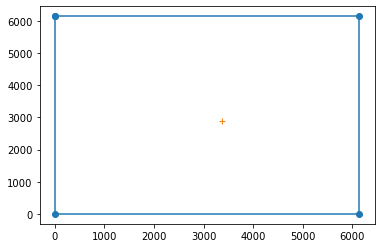

<Figure size 432x288 with 0 Axes>

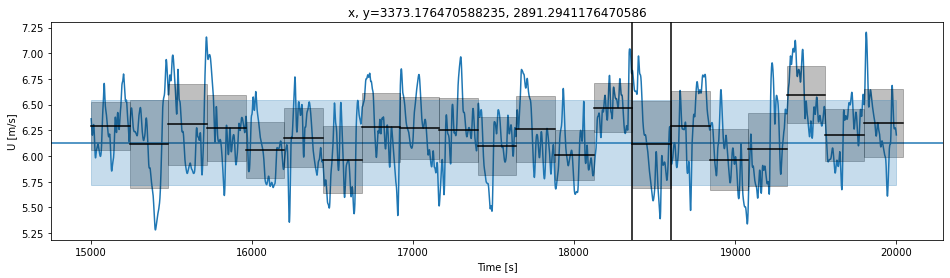

3951.435294117647 3565.929411764706 57


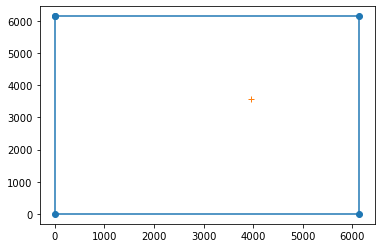

<Figure size 432x288 with 0 Axes>

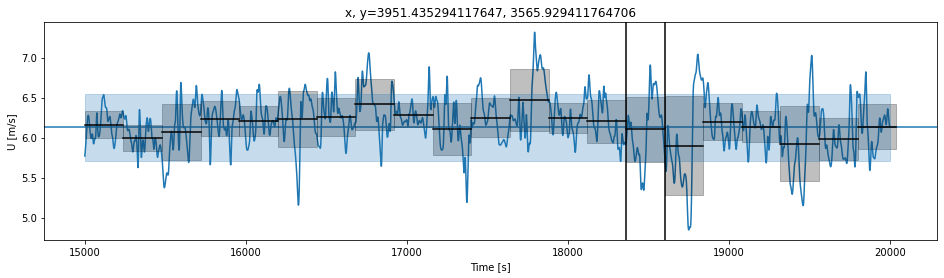

4529.694117647059 3758.6823529411763 57


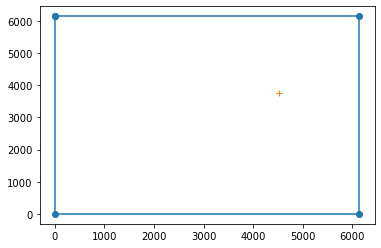

<Figure size 432x288 with 0 Axes>

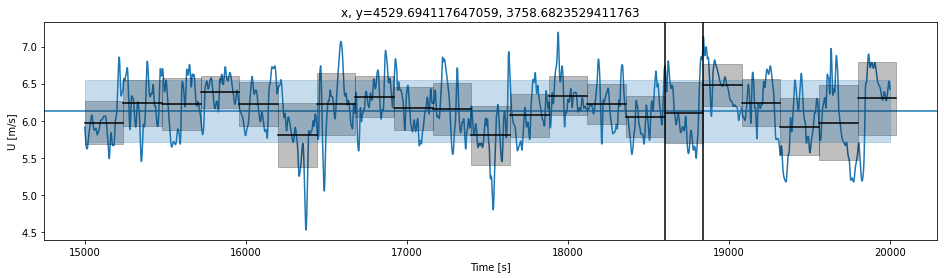

4433.317647058823 4529.694117647059 57


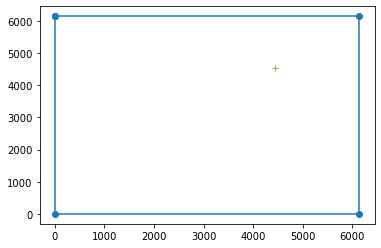

<Figure size 432x288 with 0 Axes>

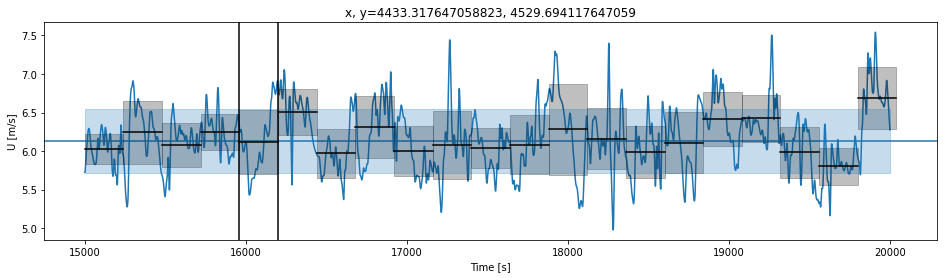

4626.070588235294 4336.941176470588 57


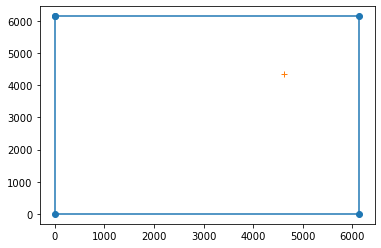

<Figure size 432x288 with 0 Axes>

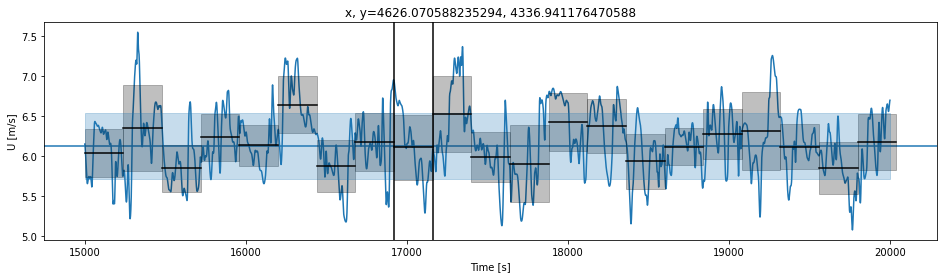

3565.929411764706 4336.941176470588 57


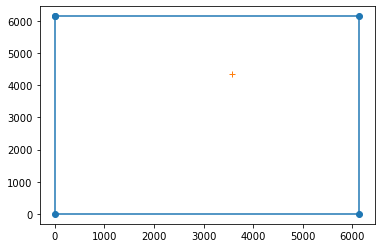

<Figure size 432x288 with 0 Axes>

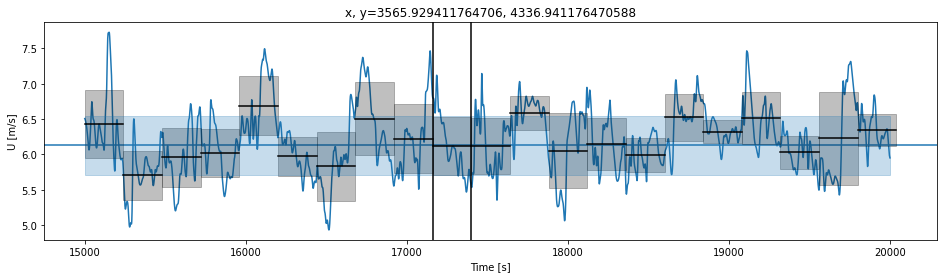

1445.6470588235293 4529.694117647059 57


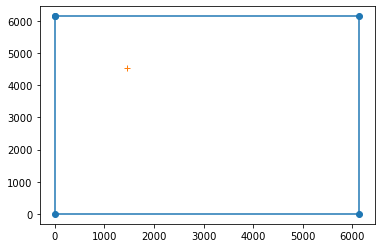

<Figure size 432x288 with 0 Axes>

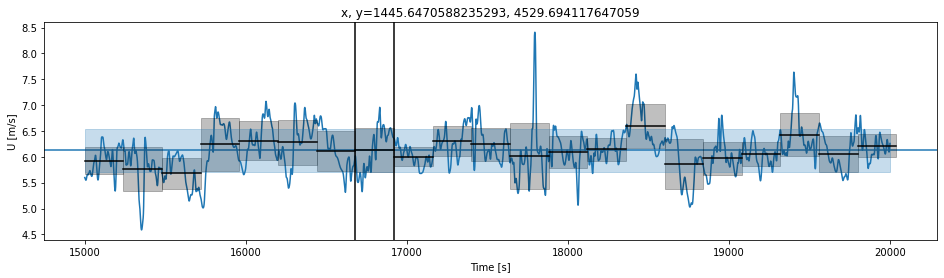

In [6]:
for xyz in xyz_ls:

    # The points to plot
    xi, yi, zi, t = xyz[:]

    print(xi, yi, zi)

    cond = (data['coordinates'][:,0] == xi) & (data['coordinates'][:,1] == yi) & (data['coordinates'][:,2] == zi)

    u = data['velocityx'][:, cond]

    plt.plot([0, 6144, 6144, 0, 0], [6144, 6144, 0, 0, 6144], 'o-')
    plt.plot(xi, yi, '+')
    plt.show()

    plt.clf()
    plt.figure(figsize=(16, 4))
    time = ncdf.Dataset(nc_file, 'r')['time']

    # A 4 minute time sampling
    dt = 4 * 60 
    time1=np.amin(time) - dt
    time2 = -1
    while time2 < np.amax(time):
        time1 += dt
        time2 = time1 + dt
        um = np.mean(u[(time>time1) & (time<time2)])
        std = np.std(u[(time>time1) & (time<time2)])
        plt.plot([time1, time2], [um, um], '-', c='k')
        plt.fill_between([time1, time2], [um-std, um-std], [um+std, um+std],
        alpha=0.25, edgecolor='k', facecolor='k')

    plt.plot(time, u, '-', zorder=-100)
    Uh = 6.13
    plt.axhline(y=Uh, zorder=-5)
    plt.axvline(x=t, c='k')
    plt.axvline(x=t + dt, c='k')
    TI = 0.068  # The turbulence intensity
    plt.fill_between([np.amin(time), np.amax(time)], [Uh * (1-TI), Uh * (1-TI)], [Uh * (1+TI), Uh * (1+TI)],
        alpha=0.25, edgecolor='tab:blue', facecolor='tab:blue')


    plt.xlabel('Time [s]')
    plt.ylabel('U [m/s]')
    plt.title('x, y=' + str(xi) + ', ' + str(yi))
    plt.show()